In [7]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


In [18]:
path_file = 'C:/Users/JulesBoutibou/Documents/Perso/PIP/DATA/ECHANTILLONS/ECHANTILLON10/echantillon10.csv'
df = pd.read_csv(path_file)
df.shape

(84935, 288)

In [19]:
# Nb fraudes dans l'échantillon
df[df.TOP_FRAUDE == 1].shape

(162, 288)

In [20]:
X = df.drop(columns=['TOP_FRAUDE'])
y = df.TOP_FRAUDE

##### Pour les exemples

In [13]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# SAMPLING

### Random

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=1/3, random_state = 123)
X_under, y_under = undersample.fit_resample(X, y)


In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)


### Oversampling Methods

##### SMOTE et BorderLine SMOTE

Counter({0: 9900, 1: 9900})
Counter({0: 9900, 1: 9900})


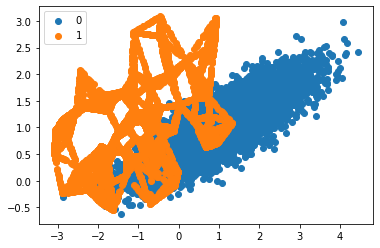

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
oversample2 = BorderlineSMOTE()

X, y = oversample2.fit_resample(X, y)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


##### ADASYGN

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


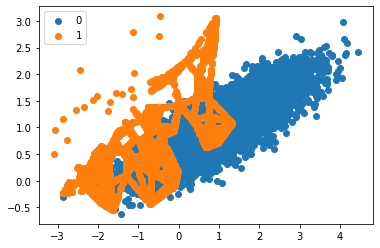

In [12]:
from imblearn.over_sampling import ADASYN

# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)


### Undersampling Methods

The choice to combine Tomek Links and CNN is natural, as Tomek Links can be said to remove borderline and noisy instances, while CNN removes redundant instances.

##### Nearmiss

In [ ]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
undersample = NearMiss(version=2, n_neighbors=3)
undersample = NearMiss(version=3, n_neighbors_ver3=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)   


##### CondensedNearestNeighbour (CNN)


In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)



##### TomeKlinks

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)


#####  Edited Nearest Neighbors (ENN)

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)


#### Conseils de mix

##### OSS = TomeLinks (Ambigüs) + CNN (Redondants)

In [ ]:
from imblearn.under_sampling import OneSidedSelection

# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X, y = undersample.fit_resample(X, y)


##### Neighborhood Cleaning Rule = CNN (Redondants) + ENN (noisy ou ambigüs)

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X, y = undersample.fit_resample(X, y)

### How to use both

##### SMOTE + ENN

In [14]:
# combined SMOTE and Edited Nearest Neighbors sampling for imbalanced classification
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define sampling
resample = SMOTEENN()
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))



Mean ROC AUC: 0.855


##### SMOTE + TomeK

In [16]:
# combined SMOTE and Tomek Links sampling for imbalanced classification
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define sampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 0.816


# Full methods

### Oversampling

In [22]:
from imblearn.over_sampling import SMOTE, SMOTENC, SMOTEN, BorderlineSMOTE, ADASYN

In [ ]:
params_smote = []

### Undersampling

In [23]:
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour, TomekLinks, EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection, NeighbourhoodCleaningRule

# Pattern

### Chose Over and Under sampling methods

In [28]:
X_numeric = df.select_dtypes(include=[np.int64, np.float64]).drop(columns = ['TOP_FRAUDE_VIREMENT','TOP_FRAUDE_CARTE','TOP_FRAUDE'])

In [25]:
over = BorderlineSMOTE(sampling_strategy=0.1)
under = OneSidedSelection(sampling_strategy='majority')
steps_sampling = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps_sampling)

In [30]:
# fit and apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X_numeric, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').